# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [195]:
import gmaps
import json
import requests
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
from scipy import stats

## Generate Cities List

In [196]:
#Set ranges from which to extract random latitudes and longitudes
lat_rng = [-90, 90]
lng_rng = [-180, 180]

cities = []

lat = np.random.uniform(-90, 90, 1500)
lng = np.random.uniform(-180, 180, 1500)
coordinates = list(zip(lat, lng))

for coord in coordinates:
    (lat, lng) = coord
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

601

In [197]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,san patricio
1,henties bay
2,barrow
3,ushuaia
4,nanortalik


In [198]:
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,,,,,,,,
1,henties bay,,,,,,,,
2,barrow,,,,,,,,
3,ushuaia,,,,,,,,
4,nanortalik,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [199]:
print("Beginning Data Retrieval")
print("___________________")

url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + "appid=" + api_key + "&q="

for index, row in cities_df.iterrows():
    city = row["city"]
    response = requests.get(query_url + city).json()
    print(f"Processing record for city number {index}: {city}")
    
    try:      
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        
        #print(f"Processing Record {index} | {city}")
        
    except (KeyError, IndexError):
        print("City not found... Continue search.")

Beginning Data Retrieval
___________________
Processing record for city number 0: san patricio
Processing record for city number 1: henties bay
Processing record for city number 2: barrow
Processing record for city number 3: ushuaia
Processing record for city number 4: nanortalik
Processing record for city number 5: aginskoye
Processing record for city number 6: uribia
Processing record for city number 7: punta arenas
Processing record for city number 8: avarua
Processing record for city number 9: cape town
Processing record for city number 10: longyearbyen
Processing record for city number 11: pisco
Processing record for city number 12: verkhnevilyuysk
Processing record for city number 13: mataura
Processing record for city number 14: saint george
Processing record for city number 15: aklavik
Processing record for city number 16: norman wells
Processing record for city number 17: tasiilaq
Processing record for city number 18: yellowknife
Processing record for city number 19: ponta do 

Processing record for city number 159: narkanda
Processing record for city number 160: loharu
Processing record for city number 161: bathsheba
Processing record for city number 162: houston
Processing record for city number 163: bambous virieux
Processing record for city number 164: angoche
Processing record for city number 165: sisimiut
Processing record for city number 166: burica
City not found... Continue search.
Processing record for city number 167: san carlos de bariloche
Processing record for city number 168: hami
Processing record for city number 169: alice springs
Processing record for city number 170: bud
Processing record for city number 171: hasaki
Processing record for city number 172: fairbanks
Processing record for city number 173: itarema
Processing record for city number 174: vila velha
Processing record for city number 175: tarudant
City not found... Continue search.
Processing record for city number 176: egvekinot
Processing record for city number 177: asau
Processi

Processing record for city number 323: talaya
Processing record for city number 324: rudnyy
Processing record for city number 325: paramonga
Processing record for city number 326: rawson
Processing record for city number 327: general pico
Processing record for city number 328: paragominas
Processing record for city number 329: hofn
Processing record for city number 330: isla vista
Processing record for city number 331: tres arroyos
Processing record for city number 332: saint-francois
Processing record for city number 333: nhulunbuy
Processing record for city number 334: nabire
Processing record for city number 335: jerome
Processing record for city number 336: belyy yar
Processing record for city number 337: salalah
Processing record for city number 338: vao
Processing record for city number 339: okha
Processing record for city number 340: polunochnoye
Processing record for city number 341: tabukiniberu
City not found... Continue search.
Processing record for city number 342: slave la

Processing record for city number 486: thinadhoo
Processing record for city number 487: charters towers
Processing record for city number 488: pochutla
Processing record for city number 489: otuzco
Processing record for city number 490: maymyo
Processing record for city number 491: bengkulu
Processing record for city number 492: rongu
City not found... Continue search.
Processing record for city number 493: uberaba
Processing record for city number 494: shadegan
Processing record for city number 495: tutoia
Processing record for city number 496: yuzhnyy
Processing record for city number 497: huntsville
Processing record for city number 498: oruro
Processing record for city number 499: bolungarvik
City not found... Continue search.
Processing record for city number 500: kasongo-lunda
Processing record for city number 501: canutama
Processing record for city number 502: xuchang
Processing record for city number 503: plettenberg bay
Processing record for city number 504: capitao poco
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [191]:
cities_csv = cities_df.to_csv(r"cities.csv")
cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,90.0,90.0,90.0,90.0,90.0,90.0,US,1626984417
1,namibe,75.0,75.0,75.0,75.0,75.0,75.0,AO,1626984283
2,tuktoyaktuk,84.0,84.0,84.0,84.0,84.0,84.0,CA,1626984417
3,bandarbeyla,82.0,82.0,82.0,82.0,82.0,82.0,SO,1626984418
4,ushuaia,98.0,98.0,98.0,98.0,98.0,98.0,AR,1626984418
...,...,...,...,...,...,...,...,...,...
608,damietta,73.0,73.0,73.0,73.0,73.0,73.0,EG,1626984432
609,harper,79.0,79.0,79.0,79.0,79.0,79.0,LR,1626984557
610,varberg,79.0,79.0,79.0,79.0,79.0,79.0,SE,1626984568
611,felanitx,68.0,68.0,68.0,68.0,68.0,68.0,ES,1626984569


In [189]:
cities_df["Latitude"] = pd.to_numeric(cities_df['Latitude'], errors='coerce')
cities_df["Longitude"] = pd.to_numeric(cities_df['Longitude'], errors='coerce')
cities_df["Humidity"] = pd.to_numeric(cities_df['Humidity'], errors='coerce')
cities_df["Max Temp"] = pd.to_numeric(cities_df['Max Temp'], errors='coerce')
cities_df["Cloudiness"] = pd.to_numeric(cities_df['Cloudiness'], errors='coerce')
cities_df["Wind Speed"] = pd.to_numeric(cities_df['Wind Speed'], errors='coerce')
cities_df.dtypes

city           object
Latitude      float64
Longitude     float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [194]:
humid_cities = cities_df.loc[cities_df['Humidity'] >= 90,:]
humid_cities

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,90.0,90.0,90.0,90.0,90.0,90.0,US,1626984417
4,ushuaia,98.0,98.0,98.0,98.0,98.0,98.0,AR,1626984418
15,te anau,90.0,90.0,90.0,90.0,90.0,90.0,NZ,1626984420
38,ishinomaki,93.0,93.0,93.0,93.0,93.0,93.0,JP,1626984426
50,seymchan,94.0,94.0,94.0,94.0,94.0,94.0,RU,1626984430
...,...,...,...,...,...,...,...,...,...
560,oktyabrskoye,93.0,93.0,93.0,93.0,93.0,93.0,RU,1626984557
570,poronaysk,94.0,94.0,94.0,94.0,94.0,94.0,RU,1626984559
581,ashta,90.0,90.0,90.0,90.0,90.0,90.0,IN,1626984562
588,abashiri,91.0,91.0,91.0,91.0,91.0,91.0,JP,1626984563


In [183]:
#  Get the indices of cities that have humidity over 100% and store them in a variable
over100 = humid_cities_df.index
over100

Int64Index([81, 306, 427], dtype='int64')

In [184]:
#Drop cities with humidity over 100
clean_df = cities_df.drop(labels=over100)

In [185]:
#clean data to remove cities that have missing data & reset index
clean_cities_df = clean_df.dropna().reset_index(drop=True)
clean_cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,90.0,90.0,90.0,90.0,90.0,90.0,US,1626984417
1,namibe,75.0,75.0,75.0,75.0,75.0,75.0,AO,1626984283
2,tuktoyaktuk,84.0,84.0,84.0,84.0,84.0,84.0,CA,1626984417
3,bandarbeyla,82.0,82.0,82.0,82.0,82.0,82.0,SO,1626984418
4,ushuaia,98.0,98.0,98.0,98.0,98.0,98.0,AR,1626984418
...,...,...,...,...,...,...,...,...,...
554,damietta,73.0,73.0,73.0,73.0,73.0,73.0,EG,1626984432
555,harper,79.0,79.0,79.0,79.0,79.0,79.0,LR,1626984557
556,varberg,79.0,79.0,79.0,79.0,79.0,79.0,SE,1626984568
557,felanitx,68.0,68.0,68.0,68.0,68.0,68.0,ES,1626984569


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

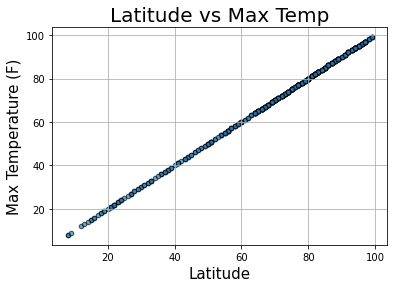

In [159]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Max Temp", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.show()

## Latitude vs. Humidity Plot

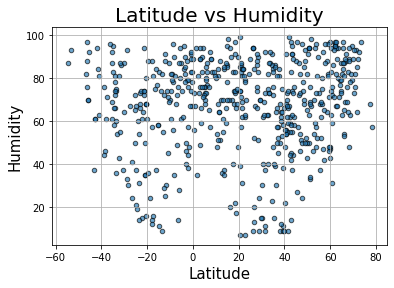

In [70]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Humidity', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Humidity", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity", size = 15)
plt.show()

## Latitude vs. Cloudiness Plot

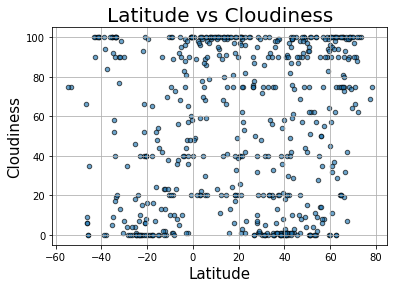

In [69]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Cloudiness', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Cloudiness", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness", size = 15)
plt.show()

## Latitude vs. Wind Speed Plot

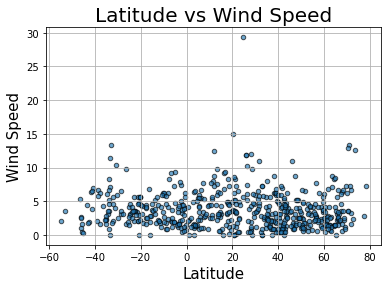

In [68]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Wind Speed', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Wind Speed", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.show()

## Linear Regression

In [101]:
nor_hem_df = clean_cities_df[clean_cities_df["Latitude"] >= 0]
nor_hem_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,84.0,84.0,84.0,84.0,84.0,84.0,US,1626980424
1,sao filipe,86.0,86.0,86.0,86.0,86.0,86.0,CV,1626980475
2,ubeda,9.0,9.0,9.0,9.0,9.0,9.0,ES,1626980475
3,albany,62.0,62.0,62.0,62.0,62.0,62.0,US,1626980398
4,acari,58.0,58.0,58.0,58.0,58.0,58.0,PE,1626980475
...,...,...,...,...,...,...,...,...,...
559,baherden,12.0,12.0,12.0,12.0,12.0,12.0,TM,1626980712
560,asahi,85.0,85.0,85.0,85.0,85.0,85.0,JP,1626980712
561,kudahuvadhoo,73.0,73.0,73.0,73.0,73.0,73.0,MV,1626980713
562,sisophon,85.0,85.0,85.0,85.0,85.0,85.0,KH,1626980713


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

AttributeError: 'float' object has no attribute 'shape'

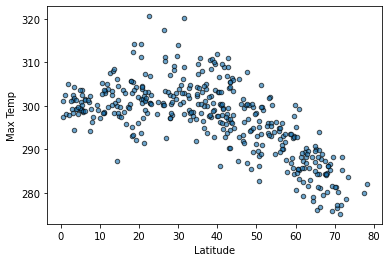

In [76]:
nor_hem_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nor_hem_df["Latitude"], nor_hem_df["Max Temp"])
vc_fit = vc_slope * nor_hem_df["Latitude"] + vc_int

plt.plot(nor_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("Latitude vs Max Temp", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


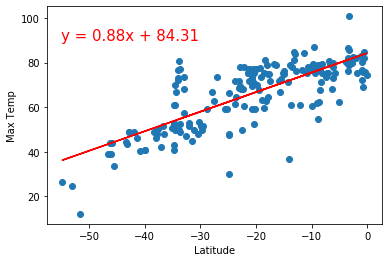

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


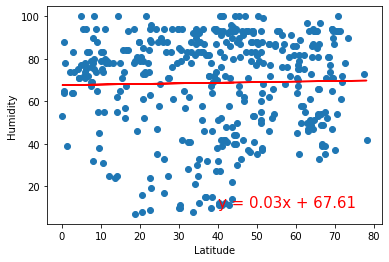

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


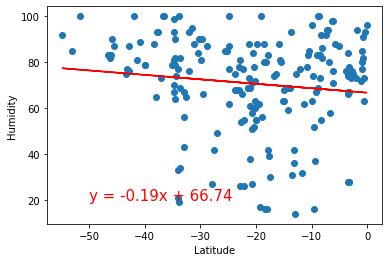

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


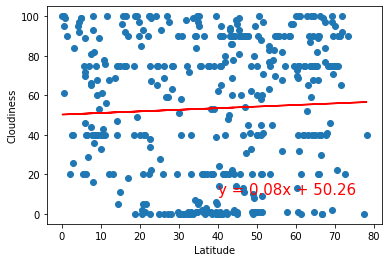

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


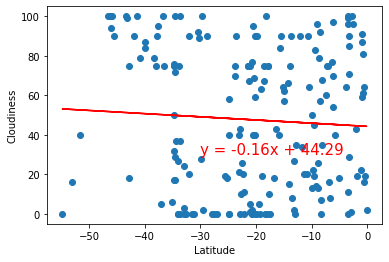

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


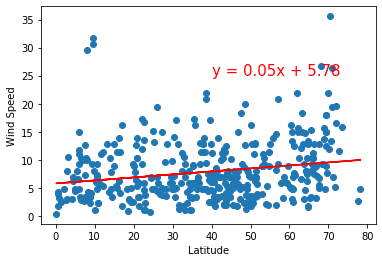

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


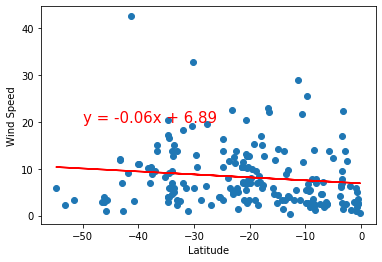